# cost function

For every community, the cost function is defined as $weight \times distance^2$. Namely, the cost function is $w ((x - x_0)^2 + (y - y_0)^2)$. w is described as the max infected number divided by the time of the infection climax. 

In [35]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Functions

In [36]:
def singleCostFunc(x_old: float, y_old: float) -> np.ndarray:
    '''
        x and y are the position of one single clinic in the coordinate, 
        The return value stores the coefficients of [x^2, x, y^2, y, 1]
    '''
    return np.array([1, -2 * x_old, 1, -2 * y_old, x_old ** 2 + y_old ** 2])

def costFunc(w_list: list, x_list: list, y_list: list):
    '''
        w_list stores the list of weight, 
        x_list stores the list of the x-axis, 
        y_list stores the list of the y-axis, 
        cost_func_coeff is the total sum of coefficients
    '''
    try:
        cost_func_coeff = np.zeros((1, 5)) # 5 means the numbers of coefficients
        # optimization
        for i in range(len(w_list)): 
            cost_func_coeff += w_list[i] * singleCostFunc(x_list[i], y_list[i]) # Addition between numpy arrays
            #print(cost_func_coeff)
        return cost_func_coeff
    except Exception as e:
        print('Sum of w_list: {}'.format(np.sum(np.array(w_list))))
        print('ERROR in cost_func: w_list = {}, x_list = {}, y_list = {}'.format(len(w_list), len(x_list), len(y_list)))
        print(e)

# Compute the partial differential in the form of [x^2, x, y^2, y, 1]
def partialDiff(coefficient_list, variable):
    second_x, first_x, second_y, first_y, constant = coefficient_list
    if variable == "x":
        diff_coefficient_list = [0, second_x*2, 0, 0, first_x]
    else:
        diff_coefficient_list = [0, 0, 0, second_y*2, first_y]
    return diff_coefficient_list

# plug in the value of x and y into the coefficient list
def plugXY (coefficient_list, x, y):
    second_x, first_x, second_y, first_y, constant = coefficient_list
    value = second_x * x * x + first_x * x + second_y * y * y + first_y * y + constant
    return value

# use gradient descent method to optimize x and y
def optimzeXY (x_list, y_list, w_list, x0, y0, learning_rate, times):
    x = x0
    y = y0
    cost_list = []
    for i in range (times):
        
        all_cost = costFunc(x_list, y_list, w_list).tolist()[0]
        #print(all_cost.tolist()[0])
        #print(type(all_cost))
        all_cost_x_efficient = partialDiff(all_cost, "x")
        all_cost_x_value = plugXY (all_cost_x_efficient, x, y)
        all_cost_y__efficient = partialDiff(all_cost, "y")
        all_cost_y_value = plugXY (all_cost_y__efficient, x, y)

        x = x - learning_rate * all_cost_x_value
        y = y - learning_rate * all_cost_y_value

        print(x,y)
        print("cost: ", plugXY(all_cost, x, y))
        cost_list.append(plugXY(all_cost, x, y))
        print("")
    
    return (x, y, cost_list)

In [37]:
type(costFunc([1,1], [2,2], [3,3]).tolist()[0])

list

## Run and Result

0.4999592766427639 0.5007907753875127
cost:  2.036980836258504

0.49991863948522336 0.5015798769297859
cost:  2.0307441177002374

0.49987808834491826 0.502367308169871
cost:  2.0245337738959837

0.49983762303977475 0.5031530726433199
cost:  2.018349693308293

0.49979724338810433 0.5039371738782006
cost:  2.0121917648714103

0.49975694920860314 0.5047196153951133
cost:  2.006059877989271

0.499716740320351 0.5055004007072061
cost:  1.9999539225335088

0.4996766165428108 0.5062795333201907
cost:  1.9938737888414888

0.4996365776958275 0.5070570167323583
cost:  1.9878193677143354

0.4995966235996273 0.5078328544345949
cost:  1.981790550414967

0.4995567540748172 0.5086070499103978
cost:  1.9757872286661442

0.4995169689423837 0.5093796066358905
cost:  1.9698092946485275

0.49947726802369224 0.5101505280798385
cost:  1.963856640998742

0.4994376511404865 0.5109198177036649
cost:  1.957929160807442

0.4993981181148873 0.511687478961466
cost:  1.9520267476174027

0.4993586687693922 0.5124535

<AxesSubplot: >

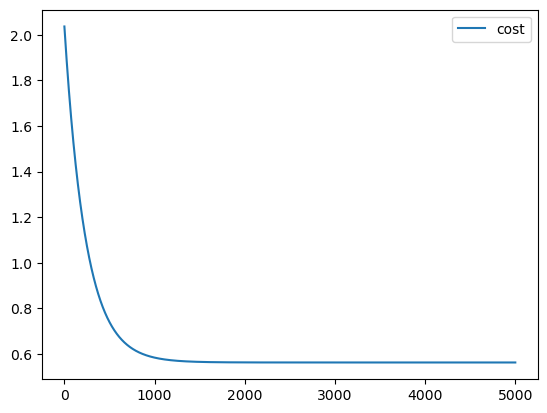

In [38]:
data_df = pd.read_excel("community.xlsx")
max_x = 1765
max_y = 1246
x_list = (data_df["x"]/max_x).tolist()
y_list = (data_df["y"]/max_y).tolist()
w_list = data_df["w"].tolist()

x,y,cost_list = optimzeXY (x_list, y_list, w_list, 0.5, 0.5, 0.0001, 5000)

print("the optimal point is: (",str(x),",",str(y),")")
print("the optimal point is: (",str(x*max_x),",",str(y*max_y),")")
cost_df = pd.DataFrame()
cost_df["cost"] = cost_list
cost_df.plot()

In [39]:
data_df.head()

,Unnamed: 0.1,Unnamed: 0,社区名称,地址,常住人口,发热诊室,x,y,标记名称,w
0,0,0,金山街道金洲社区,福州市仓山区金环路5号,8500.0,金洲社区卫生服务站,1154,283,福建省福州市仓山区金环路5号,0.660550
1,1,1,金山街道幸福社区,仓山区浦上大道418号泰禾红峪A14号楼一层,7850.0,丽景社区卫生服务站,801,945,福建省福州市仓山区葛屿路,0.949388
2,2,2,金山街道六江道社区,福州市仓山区金桔路826号68栋旁,6900.0,中天社区卫生服务站,432,980,福建省福州市仓山区金桔路,0.831630
3,3,3,金山街道金环社区,福州市仓山区金山街道金榕南路10号榕城广场8号楼一层,10832.0,金洲社区卫生服务站,1303,256,福建省福州市仓山区友兰路,0.660550
4,4,4,金山街道鑫龙社区,福州市仓山区石边支路1号,9000.0,丽景社区卫生服务站,704,479,福建省少年儿童图书馆金山街道鑫龙社区分馆,0.949388


## Heat map

<AxesSubplot: >

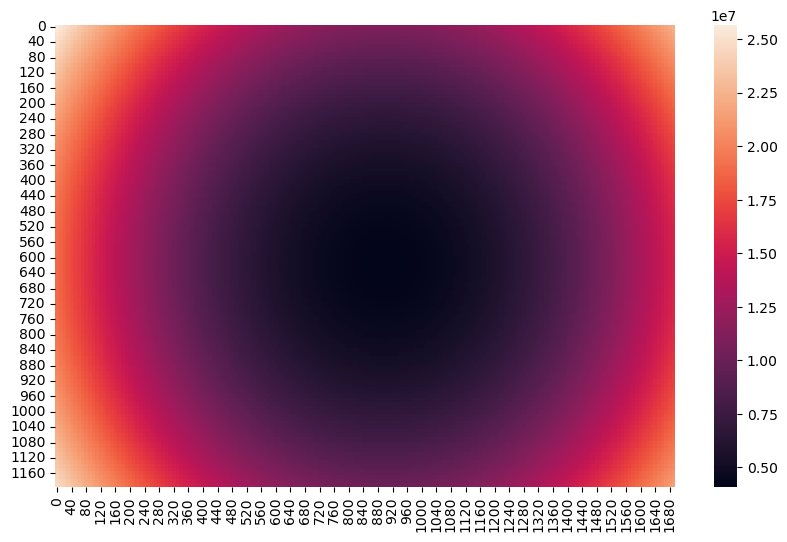

In [40]:
data_df = pd.read_excel("community.xlsx")
communities_x_list = (data_df["x"]).tolist()
communities_y_list = (data_df["y"]).tolist()
communities_w_list = data_df["w"].tolist()

#communities_w_list = np.ones(21).tolist()
data_df.head()

x_coordinate_list_str = [str(i) for i in range (0,1700,10)]
y_coordinate_list_str = [str(i) for i in range (0,1200,10)]
x_coordinate_list = [i for i in range (0,1700,10)]
y_coordinate_list = [i for i in range (0,1200,10)]

heatmap_array = np.zeros((len(y_coordinate_list),len(x_coordinate_list)))
one_cost_coefficient = costFunc(communities_w_list, communities_x_list, communities_y_list).tolist()[0]

for i in range(0,len(x_coordinate_list)): 
    for j in range(0,len(y_coordinate_list)):
        x = x_coordinate_list[i]
        y = y_coordinate_list[j]
        one_cost_value = plugXY (one_cost_coefficient, x, y)
        heatmap_array[j,i] = one_cost_value
        
x_tick_list = [str(i) for i in range (0,1700,10)]
y_tick_list = [str(i) for i in range (0,1200,10)]

data_tick_dic = {}

for i in range(len(x_tick_list)):
    data_tick_dic[x_tick_list[i]] = heatmap_array[:,i]

pd_data=pd.DataFrame(data_tick_dic,index=y_tick_list,columns=x_tick_list)

plt.figure(figsize=(10, 6))
sns.heatmap(pd_data, square=False)

In [41]:
pd_data

,0,10,20,30,40,50,60,70,80,90,...,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690
0,2.566907e+07,2.534452e+07,2.502359e+07,2.470630e+07,2.439264e+07,2.408261e+07,2.377621e+07,2.347344e+07,2.317431e+07,2.287880e+07,...,1.993208e+07,2.018855e+07,2.044866e+07,2.071239e+07,2.097976e+07,2.125076e+07,2.152540e+07,2.180366e+07,2.208556e+07,2.237108e+07
10,2.544670e+07,2.512214e+07,2.480122e+07,2.448392e+07,2.417026e+07,2.386023e+07,2.355383e+07,2.325107e+07,2.295193e+07,2.265643e+07,...,1.970970e+07,1.996617e+07,2.022628e+07,2.049002e+07,2.075739e+07,2.102839e+07,2.130302e+07,2.158129e+07,2.186318e+07,2.214871e+07
20,2.522795e+07,2.490340e+07,2.458247e+07,2.426518e+07,2.395152e+07,2.364149e+07,2.333509e+07,2.303232e+07,2.273319e+07,2.243768e+07,...,1.949096e+07,1.974743e+07,2.000754e+07,2.027127e+07,2.053864e+07,2.080965e+07,2.108428e+07,2.136254e+07,2.164444e+07,2.192996e+07
30,2.501284e+07,2.468829e+07,2.436736e+07,2.405007e+07,2.373641e+07,2.342638e+07,2.311998e+07,2.281721e+07,2.251807e+07,2.222257e+07,...,1.927584e+07,1.953232e+07,1.979242e+07,2.005616e+07,2.032353e+07,2.059453e+07,2.086916e+07,2.114743e+07,2.142932e+07,2.171485e+07
40,2.480136e+07,2.447680e+07,2.415588e+07,2.383859e+07,2.352492e+07,2.321489e+07,2.290850e+07,2.260573e+07,2.230659e+07,2.201109e+07,...,1.906436e+07,1.932084e+07,1.958094e+07,1.984468e+07,2.011205e+07,2.038305e+07,2.065768e+07,2.093595e+07,2.121784e+07,2.150337e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2.390001e+07,2.357545e+07,2.325453e+07,2.293723e+07,2.262357e+07,2.231354e+07,2.200714e+07,2.170437e+07,2.140524e+07,2.110973e+07,...,1.816301e+07,1.841948e+07,1.867959e+07,1.894333e+07,1.921070e+07,1.948170e+07,1.975633e+07,2.003459e+07,2.031649e+07,2.060201e+07
1160,2.409525e+07,2.377069e+07,2.344977e+07,2.313247e+07,2.281881e+07,2.250878e+07,2.220238e+07,2.189961e+07,2.160048e+07,2.130497e+07,...,1.835825e+07,1.861472e+07,1.887483e+07,1.913857e+07,1.940594e+07,1.967694e+07,1.995157e+07,2.022983e+07,2.051173e+07,2.079725e+07
1170,2.429412e+07,2.396956e+07,2.364864e+07,2.333134e+07,2.301768e+07,2.270765e+07,2.240125e+07,2.209849e+07,2.179935e+07,2.150385e+07,...,1.855712e+07,1.881359e+07,1.907370e+07,1.933744e+07,1.960481e+07,1.987581e+07,2.015044e+07,2.042871e+07,2.071060e+07,2.099613e+07
1180,2.449662e+07,2.417207e+07,2.385114e+07,2.353385e+07,2.322019e+07,2.291016e+07,2.260376e+07,2.230099e+07,2.200185e+07,2.170635e+07,...,1.875962e+07,1.901610e+07,1.927620e+07,1.953994e+07,1.980731e+07,2.007831e+07,2.035294e+07,2.063121e+07,2.091310e+07,2.119863e+07


In [58]:
#np.min(heatmap_array) 4082738
wh = np.where(heatmap_array<4083000)
print(wh)
print(len(wh[0]))

(array([62], dtype=int64), array([90], dtype=int64))
1


In [57]:
heatmap_array.shape

(120, 170)